In [778]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [779]:
columns = ['Tier','Type 1','Type 2','HP','Attack','Defense','Special Attack','Special Defense','Speed']

In [776]:
df = pd.read_csv('pokemon-data - pokemon-data.csv')

#LETS DESTROY NaN values from Tier
print(len(df[:]))
df.dropna(subset = ["Tier"], inplace=True)
print(len(df[:]))

#Now its fine :)
df = df.reset_index(drop=True)
df.to_csv('pokemon-data - pokemon-data.csv'
                          ,index=False)

814
814


In [777]:
#No names pls
df = df.iloc[:, 1:]
df.head()

,Tier,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,PU,Grass,Ice,90,92,75,92,85,60
1,NU,Grass,Ice,90,132,105,132,105,30
2,LC,Psychic,NOT2,25,20,15,105,55,90
3,PU,Dark,NOT2,65,130,60,75,60,75
4,RU,Dark,NOT2,65,150,60,115,60,115


In [744]:
df['Tier'].value_counts()

LC      265
PU      230
UU       75
RU       73
NU       69
OU       55
Uber     47
Name: Tier, dtype: int64

In [745]:
#OH NO, MY VALUES ARE NOT NUMERIC :C
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [780]:
# NUMBERSSSS, YEAH
df = df.apply(lambda x: d[x.name].fit_transform(x))

In [747]:
df.head()

,Tier,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,3,9,11,61,66,50,65,55,40
1,1,9,11,61,96,74,96,72,12
2,0,14,12,3,3,2,75,28,70
3,3,1,12,37,94,35,51,33,55
4,4,1,12,37,105,35,85,33,93


In [748]:
d.keys()

dict_keys(['Tier', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])

In [781]:
#All keys
for key in d.keys():
    print(key, d[key].classes_)

Tier ['LC' 'NU' 'OU' 'PU' 'RU' 'UU' 'Uber']
Type 1 ['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']
Type 2 ['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'NOT2' 'Normal' 'Poison' 'Psychic' 'Rock'
 'Steel' 'Water']
HP [  1  10  20  25  28  30  31  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  88  89  90  91  92  95  97  99 100 101 103 104 105
 106 107 108 109 110 111 114 115 116 120 123 125 126 130 135 137 140 144
 150 160 165 170 190 216 223 250 255]
Attack [  5  10  15  20  23  24  25  27  29  30  33  35  36  38  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78

In [750]:
#NOW SAVE IT
df.to_csv('pokemon-data-encoded.csv'
                          ,index=False)

In [783]:
# I LOVE RANDOMNESS
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the dataset

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [784]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [753]:
# Write Training Set
df[:train].to_csv('pokemon_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [754]:
# Write Validation Set
df[train:].to_csv('pokemon_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [755]:
# Write Column List
with open('pokemon_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [756]:
############################################## Train #########################################################

# Install xgboost in notebook instance.
#### Command to install xgboost
#!pip install xgboost==1.2

In [757]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [758]:
column_list_file = 'pokemon_train_column_list.txt'
train_file = 'pokemon_train.csv'
validation_file = 'pokemon_validation.csv'

columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [759]:
# Specify the column names as the file does not have column header
df_train = df[:train]
df_validation = df[train:]

In [785]:
#The randomness is random, so the dataset also is. So check if the first number is bigger than the second (it can also throw errors)
for key in columns:
    print(key)
    print(len(df_train[key].value_counts()))
    print(len(df_validation[key].value_counts()))


Tier
7
7
Type 1
18
18
Type 2
19
18
HP
91
60
Attack
105
77
Defense
101
68
Special Attack
97
75
Special Defense
87
62
Speed
100
76


In [761]:
# You need a classifier (multi:softmax)
classifier = xgb.XGBClassifier(objective="multi:softmax",
                               num_class=7,
                               n_estimators=100)

In [762]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [763]:
#This can throw errors if the random dataset is not enough good
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)],
               eval_metric=['mlogloss'],
               early_stopping_rounds=10)


[0]	validation_0-mlogloss:1.44078	validation_1-mlogloss:1.63271
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.16190	validation_1-mlogloss:1.48835
[2]	validation_0-mlogloss:0.96703	validation_1-mlogloss:1.41216
[3]	validation_0-mlogloss:0.83207	validation_1-mlogloss:1.36249
[4]	validation_0-mlogloss:0.72142	validation_1-mlogloss:1.33036
[5]	validation_0-mlogloss:0.63250	validation_1-mlogloss:1.31382
[6]	validation_0-mlogloss:0.56445	validation_1-mlogloss:1.30227
[7]	validation_0-mlogloss:0.50857	validation_1-mlogloss:1.29365
[8]	validation_0-mlogloss:0.45754	validation_1-mlogloss:1.28275
[9]	validation_0-mlogloss:0.41317	validation_1-mlogloss:1.27345
[10]	validation_0-mlogloss:0.37109	validation_1-mlogloss:1.27696
[11]	validation_0-mlogloss:0.33871	validation_1-mlogloss:1.27812
[12]	validation_0-mlogloss:0.30704	validation_1-mlogloss:1.2907

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=7, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [764]:
# So, is it good?
eval_result = classifier.evals_result()

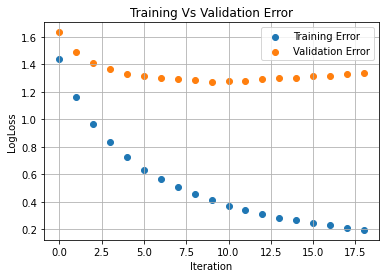

In [765]:
#LETS SEEEE
training_rounds = range(len(eval_result['validation_0']['mlogloss']))

plt.scatter(x=training_rounds,y=eval_result['validation_0']['mlogloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['mlogloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

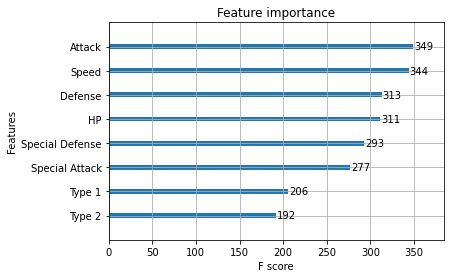

In [775]:
#And what feature was the most important?
xgb.plot_importance(classifier)
plt.show()

In [767]:
#Tasty. TEST
df_test = pd.read_csv('pokemon_validation.csv',names=columns)
X_test = df_test.iloc[:,1:]
result = classifier.predict(X_test)
df_test['Predicted Tier'] = result

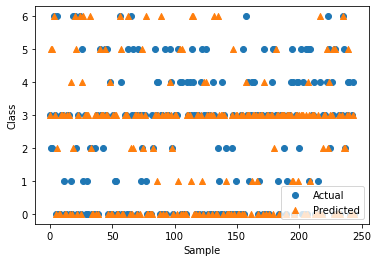

In [786]:
# You wont see a shit here. But its the predicted and actual tiers for the values
plt.figure()
plt.scatter(df_test.index,df_test['Tier'],label='Actual')
plt.scatter(df_test.index,df_test['Predicted Tier'],label='Predicted',marker='^')
plt.legend(loc=4)
plt.yticks([0,1,2,3,4,5,6])
plt.xlabel('Sample')
plt.ylabel('Class')
plt.show()

In [769]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [771]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df_test['Tier'],
                              df_test['Predicted Tier'],labels=[0,1,2,3,4,5,6])

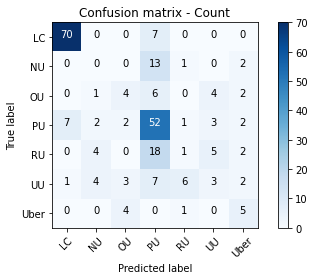

In [772]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=d['Tier'].classes_,
                      title='Confusion matrix - Count')

In [787]:
#Well, here are the results
print(classification_report(
    df_test['Tier'],
    df_test['Predicted Tier'],
    labels=[0,1,2,3,4,5,6,7,8,9,10],
    target_names=d['Tier'].classes_))

              precision    recall  f1-score   support

          LC       0.90      0.91      0.90        77
          NU       0.00      0.00      0.00        16
          OU       0.31      0.24      0.27        17
          PU       0.50      0.75      0.60        69
          RU       0.10      0.03      0.05        30
          UU       0.20      0.12      0.15        26
        Uber       0.33      0.50      0.40        10

   micro avg       0.55      0.55      0.55       245
   macro avg       0.21      0.23      0.22       245
weighted avg       0.49      0.55      0.51       245



C:\Users\germa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1986: UserWarning: labels size, 11, does not match size of target_names, 7
  warnings.warn(
C:\Users\germa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\germa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\germa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

So, what have we learned?
Stats and types are not enough information for training. Maybe with moves and other stats this can works better. But maybe the competitive its more than only stats and weaknesses.
I don't know. Do yourself a favor and dont play competitive pokemon